In [8]:
import numpy as np
import xarray as xr
import intake
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [9]:
url = "https://raw.githubusercontent.com/andrewpauling/cmip6hack-so-project/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [10]:
cat = col.search(source_id='CESM2', experiment_id='historical', member_id='r1i1p1f1', grid_label='gn', variable_id='siconc')
cat.df
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': True},
                                cdf_kwargs={'chunks': {}, 'decode_times': True})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [11]:
dset_dict.keys()

dict_keys(['CMIP.NCAR.CESM2.historical.SImon.gn'])

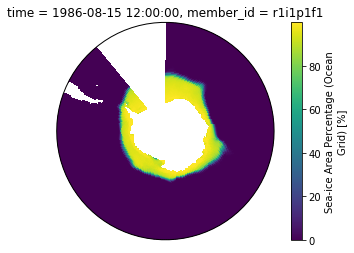

In [29]:
ds = dset_dict['CMIP.NCAR.CESM2.historical.SImon.gn']
siconc = ds['siconc'].squeeze()
siconc_slice = siconc[1639, :, :]

axs = plt.axes(projection=ccrs.SouthPolarStereo())
siconc_slice.plot(ax=axs, transform=ccrs.PlateCarree())


In [27]:
siconc_slice

<xarray.DataArray 'siconc' (nj: 384, ni: 320)>
dask.array<getitem, shape=(384, 320), dtype=float32, chunksize=(384, 320), chunktype=numpy.ndarray>
Coordinates:
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    time       object 1986-01-15 12:00:00
    member_id  <U8 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Area fraction of grid cell covered by sea ice
    description:    Area fraction of grid cell covered by sea ice
    frequency:      mon
    id:             siconc
    long_name:      Sea-ice Area Percentage (Ocean Grid)
    mipTable:       SImon
    out_name:       siconc
    prov:           SIMIP [seaicemon]
    realm:          seaIce
    standard_name:  sea_ice_area_fraction
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:         

In [20]:
2015-1986

29

In [21]:
29*12

348